# Real Time Face Mask Detection
### task 2
#### Sync Machine Learning Internship
##### Tridib dalui


In [1]:
! pip install -q kaggle

In [4]:
# Acessing direct dataset from kaggle

!rm -r ~/.kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

rm: cannot remove '/root/.kaggle': No such file or directory


In [5]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 99% 327M/330M [00:13<00:00, 31.9MB/s]
100% 330M/330M [00:13<00:00, 25.6MB/s]


In [6]:
# unzipping

import zipfile
ref=zipfile.ZipFile('/content/face-mask-12k-images-dataset.zip','r')
ref.extractall('/content')
ref.close()

In [2]:
import numpy as np
import pandas as pd
import os

In [7]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image

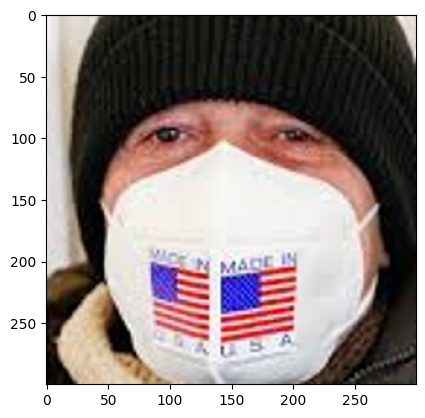

In [8]:
x="/content/Face Mask Dataset/Train/WithMask/1212.png"
img=Image.open(x)
img = img.resize((300,300))
sr = np.array(img) 
plt.imshow(img)
plt.show()

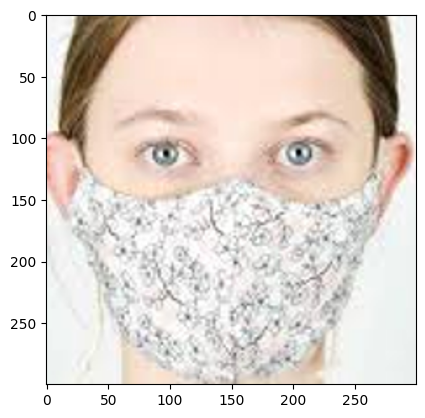

In [12]:
x="/content/Face Mask Dataset/Train/WithMask/1057.png"
img=Image.open(x)
img = img.resize((300,300))
sr = np.array(img) 
plt.imshow(img)
plt.show()

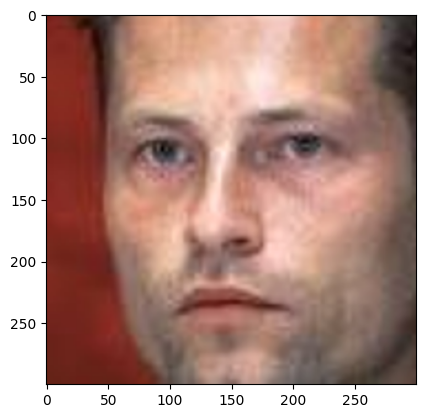

In [13]:
x="/content/Face Mask Dataset/Train/WithoutMask/1022.png"
img=Image.open(x)
img = img.resize((300,300))
sr = np.array(img) 
plt.imshow(img)
plt.show()

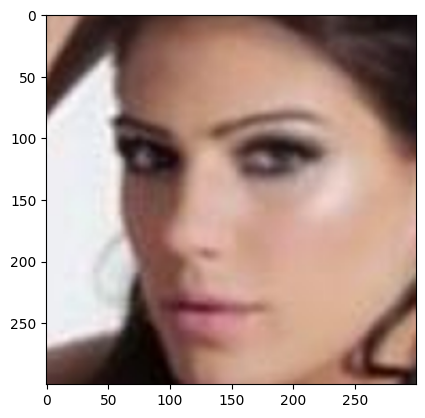

In [14]:
x="/content/Face Mask Dataset/Train/WithoutMask/1112.png"
img=Image.open(x)
img = img.resize((300,300))
sr = np.array(img) 
plt.imshow(img)
plt.show()

In [15]:
 # Normalization 

from keras.preprocessing import image
# path set korchi
train_path = "/content/Face Mask Dataset/Train"
# image generation object
data=image.ImageDataGenerator(rescale=1./255)
#dataset normalization
x=data.flow_from_directory(train_path, 
                           target_size = (26,26),
                           batch_size = 32, 
                           class_mode = 'categorical')

Found 10000 images belonging to 2 classes.


In [16]:
# Displaying the Classes

classes=['WithMask','WithoutMask']

In [17]:
# Storing The Data and the Labels

data = []
labels = []
for i in classes:
    path = os.path.join(train_path,str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image=Image.open(path + '/' + a)
            image=image.resize((30,30))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("error loading image.")
data = np.array(data)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(10000, 30, 30, 3)
(10000,)


In [18]:
# splitting the training and testing data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=50)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8000, 30, 30, 3) (2000, 30, 30, 3) (8000,) (2000,)


In [19]:
# Lets Convert the labels to categorical

from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder # first amader oi string type category guloke int e ante hobe 
label_encoder = LabelEncoder()
y_train=np.array(y_train)
y_test=np.array(y_test)
y_train=label_encoder.fit_transform(y_train)
y_test=label_encoder.fit_transform(y_test)

In [20]:
y_train=to_categorical(y_train,num_classes=2)
y_test=to_categorical(y_test,num_classes=2)

In [21]:
# importing librareis for CNN

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [22]:
model= Sequential()

#Layer1: 32 Filters
model.add(Conv2D(32,kernel_size=(5,5),padding='valid',activation='relu',input_shape=x_train.shape[1:])) # convolution layer
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid')) #pooling layer
model.add(Dropout(rate=0.25)) # dropout layer
#Layer2: 64 Filters
model.add(Conv2D(64,kernel_size=(5,5),padding='valid',activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(rate=0.25))

#Flatten Layer
model.add(Flatten())

#Now we will add 1 fully connected layers
model.add(Dense(256,activation='relu'))

#Final Dropout Layer
model.add(Dropout(rate=0.5))

#Final Dense layer with 2 as Output is 2 Class
model.add(Dense(2, activation='softmax'))

In [23]:
#Summary of the Model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 64)          0

In [24]:
#compiling the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# fitting
history=model.fit(x_train,y_train,batch_size=32,epochs=25,validation_data=(x_test, y_test))

Epoch 1/25
250/250 [==============================] - 20s 74ms/step - loss: 1.7942 - accuracy: 0.8758 - val_loss: 0.1369 - val_accuracy: 0.9520
Epoch 2/25
250/250 [==============================] - 19s 78ms/step - loss: 0.1723 - accuracy: 0.9385 - val_loss: 0.0976 - val_accuracy: 0.9665
Epoch 3/25
250/250 [==============================] - 18s 72ms/step - loss: 0.1475 - accuracy: 0.9507 - val_loss: 0.1020 - val_accuracy: 0.9620
Epoch 4/25
250/250 [==============================] - 18s 72ms/step - loss: 0.1414 - accuracy: 0.9529 - val_loss: 0.1589 - val_accuracy: 0.9670
Epoch 5/25
250/250 [==============================] - 19s 75ms/step - loss: 0.1118 - accuracy: 0.9596 - val_loss: 0.0664 - val_accuracy: 0.9820
Epoch 6/25
250/250 [==============================] - 18s 71ms/step - loss: 0.0967 - accuracy: 0.9650 - val_loss: 0.1066 - val_accuracy: 0.9715
Epoch 7/25
250/250 [==============================] - 18s 70ms/step - loss: 0.1022 - accuracy: 0.9650 - val_loss: 0.0640 - val_accuracy:

In [26]:
# accuracy of the model

score = model.evaluate(x_test,y_test,verbose = 0)
print('test accuracy: ', score[1]*100,'%')

test accuracy:  97.85000085830688 %


to test our model

In [27]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def check(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    x=np.array(data)
    y=np.argmax(model.predict(x),axis=1)
    return image,y

1/1 [==============================] - 0s 177ms/step
Prediction:  WithoutMask


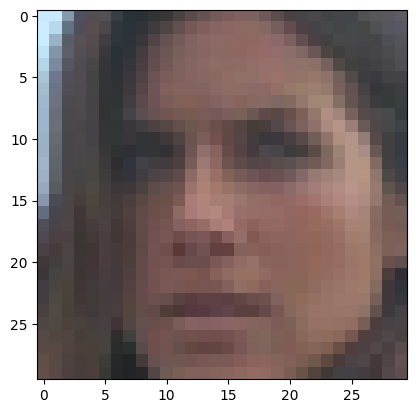

In [28]:
plot,prediction=check(r'/content/Face Mask Dataset/Train/WithoutMask/1067.png') # ans is without Mask
s=[str(i)for i in prediction] 
a="".join(s)
a=int(a)
print("Prediction: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 26ms/step
Prediction:  WithMask


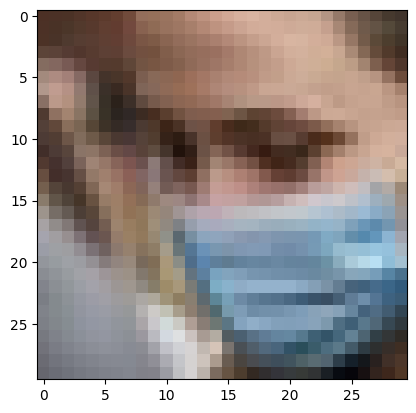

In [30]:
plot,prediction=check(r'/content/Face Mask Dataset/Train/WithMask/1153.png') # ans is with mask
s=[str(i)for i in prediction] 
a="".join(s)
a=int(a)
print("Prediction: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 37ms/step
Prediction:  WithMask


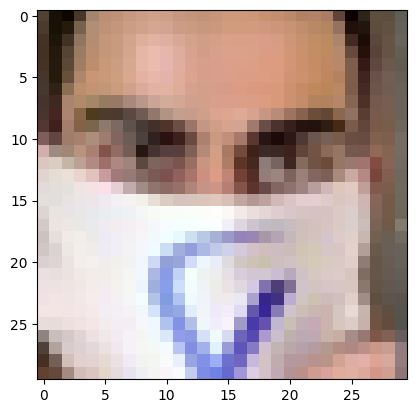

In [32]:
plot,prediction=check(r'/content/Face Mask Dataset/Train/WithMask/1415.png') # ans is with mask 
s=[str(i)for i in prediction] 
a="".join(s)
a=int(a)
print("Prediction: ", classes[a])
plt.imshow(plot)
plt.show()

1/1 [==============================] - 0s 26ms/step
Prediction:  WithoutMask


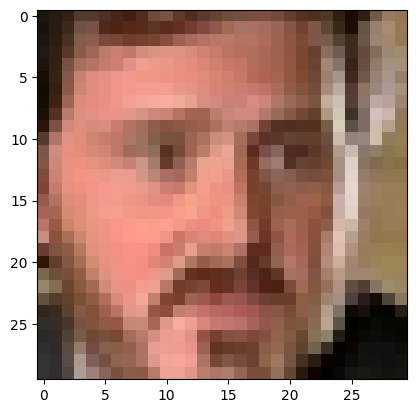

In [33]:
plot,prediction=check(r'/content/Face Mask Dataset/Train/WithoutMask/1104.png') # ans is Without mask
s=[str(i)for i in prediction] 
a="".join(s)
a=int(a)
print("Prediction: ", classes[a])
plt.imshow(plot)
plt.show()

In [34]:
import pickle
pickle.dump(model,open('maskdetector.pkl','wb'))

In [35]:
model.save('model.h5')